### Sentinel-3 Level-2 altimetry data visualization.
#### Data download from: https://dataspace.copernicus.eu/explore-data/data-collections


In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import netCDF4 as nc
import numpy as np
from pyrsimg import readTiff, imgShow, second_to_dyr



In [3]:
## s3 data
path_s3l2 = 'data/sentinel-3/S3A_SR_2_LAN____20200523T030933_20200523T035741_20200617T203903_2888_058_289______LN3_O_NT_004.SEN3/enhanced_measurement.nc'
## remote sensing data
path_rsimg = 'data/rsimg/dianchi_s2_20200511_wgs84.tif'


#### Data reading

In [4]:
## 1. s3l2 altimetry data
s3_l2 = nc.Dataset(path_s3l2)
## 2. remote sensing image
rsimg = readTiff(path_rsimg)


In [6]:
for i in range(len(s3_l2.variables.keys())):
  print(list(s3_l2.variables.keys())[i])



time_01
time_20_ku
time_20_c
echo_sample_ind
UTC_day_01
UTC_sec_01
UTC_day_20_ku
UTC_sec_20_ku
UTC_day_20_c
UTC_sec_20_c
UTC_time_1hz_20_ku
UTC_time_1hz_20_c
lat_01
lon_01
lat_20_ku
lon_20_ku
lat_20_c
lon_20_c
lat_cor_20_ku
lon_cor_20_ku
lat_cor_20_c
lon_cor_20_c
surf_type_01
surf_type_20_ku
surf_type_20_c
surf_class_01
surf_class_20_ku
surf_class_20_c
rad_surf_type_01
dist_coast_01
dist_coast_20_ku
dist_coast_20_c
alt_01
alt_20_ku
alt_20_c
orb_alt_rate_01
orb_alt_rate_20_ku
orb_alt_rate_20_c
tracker_range_20_ku
tracker_range_20_c
tracker_range_20_plrm_ku
h0_nav_dem_20_ku
agc_01_ku
agc_01_c
agc_01_plrm_ku
agc_20_ku
agc_20_c
agc_20_plrm_ku
agc_numval_01_ku
agc_numval_01_c
agc_numval_01_plrm_ku
agc_rms_01_ku
agc_rms_01_c
agc_rms_01_plrm_ku
agc_qual_20_ku
agc_qual_20_c
agc_qual_20_plrm_ku
scale_factor_20_ku
scale_factor_20_c
scale_factor_20_plrm_ku
range_ocean_01_ku
range_ocean_01_c
range_ocean_01_plrm_ku
range_ocean_20_ku
range_ocean_20_c
range_ocean_20_plrm_ku
range_ocean_qual_01_ku
ran

In [31]:
lat_20_ku = s3_l2['lat_cor_20_ku'][:]
lon_20_ku = s3_l2['lon_cor_20_ku'][:]
time_20_ku = s3_l2['time_20_ku'][:]
waveform_20_ku = s3_l2['waveform_20_ku'][:]
time_20_ku_dyr = second_to_dyr(time_20_ku)
print('waveform data:', waveform_20_ku.shape)  ## waveform


waveform data: (34445, 128)


### Visualization from global perspective

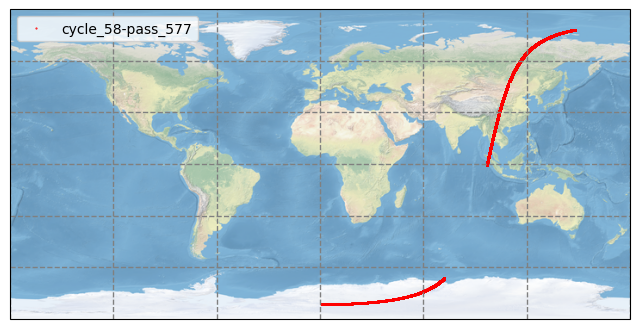

In [11]:
proj = ccrs.PlateCarree(central_longitude=0.0)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection=proj)
ax.stock_img()
orbit = 'cycle_'+str(s3_l2.cycle_number)+'-pass_'+str(s3_l2.pass_number)
ax.plot(lon_20_ku, lat_20_ku, marker='.', markersize=1, linewidth=0.0, label=orbit, color='red')
ax.gridlines(linewidth=1, color='gray', linestyle='--')
ax.legend()


### Visualization from local perspective

Text(0.5, 1.0, 'merged data')

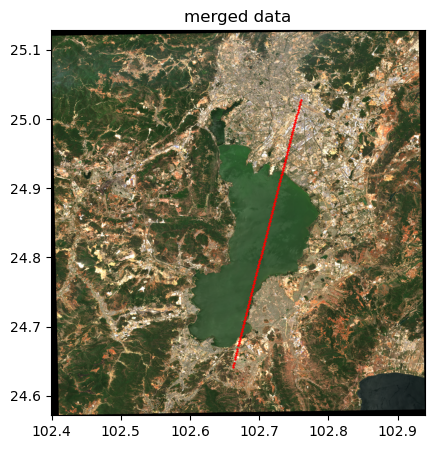

In [33]:
ids = np.where((lat_20_ku[:]>24.64) & (lat_20_ku[:]<25.03))  
fig, ax = plt.subplots(1,1, figsize=(5, 5))
imgShow(rsimg.array, extent=rsimg.geoextent, ax=ax)
plt.scatter(x=lon_20_ku[ids], y=lat_20_ku[ids], s=0.5, color='red')  ## altimetry data
plt.title('merged data')


#### Check retracked surface elevation value.

(1854.4, 1855.2)

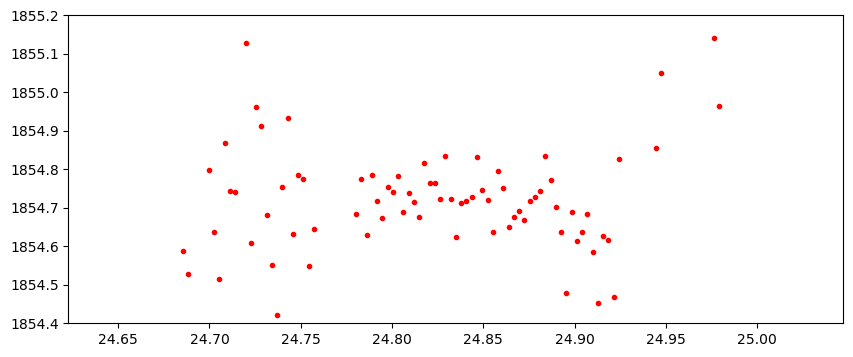

In [36]:
## 3.3 ocog retracker(official given)
h_cor_ocog = s3_l2['elevation_ocog_20_ku'][:]
plt.figure(figsize=(10,4))
plt.plot(lat_20_ku[ids], h_cor_ocog[ids], 'r.')
plt.ylim(1854.4, 1855.2)


#### Check the waveform

In [38]:
ids = np.argmin(abs((lat_20_ku[:] - 24.8))) 
wf_sar = s3_l2['waveform_20_ku'][:][ids]
wf_lrm = s3_l2['waveform_20_plrm_ku'][:][ids]


Text(0.5, 1.0, 'lrm waveform')

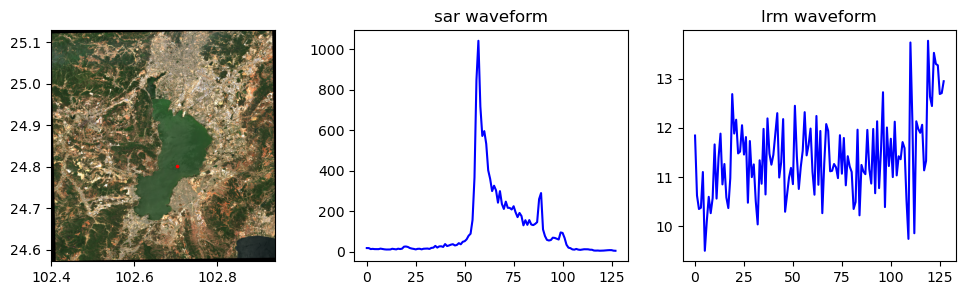

In [39]:
fig, ax = plt.subplots(1,3, figsize=(12,3))
imgShow(rsimg.array, extent=rsimg.geoextent, ax=ax[0])
ax[0].scatter(x=lon_20_ku[ids], y=lat_20_ku[ids], s=2.5, color='red')  ## altimetry data
ax[1].plot(wf_sar, color='blue')
ax[1].set_title('sar waveform')
ax[2].plot(wf_lrm, color='blue')
ax[2].set_title('lrm waveform')
